# LAB 9
# PDE

## gauss siedel iterative scheme

Parabolic PDE of 2 variables, 

$$u_{xx} + u_{yy} = 0 \quad for \quad 0 \leq x,y \leq 4 $$

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$Boundary Condition: 
$$u = x^2y^2 on the boundary$$

$$u_{ij}^{0} = 0$$

$$\text{Experiment with different}\; \delta x.$$

In [4]:
import numpy as np
import pandas as pd

In [71]:
x1 = 0
x2 = 4

In [110]:
def gauss_siedel(dx,x_last,x_next,y_last,y_next):
    return (x_last+x_next+y_last+y_next)/4


def main_(dx=0.5):
    err = 0.000000001
    
    n = int((x2-x1)/dx)
    
    xy = np.zeros((n+1,n+1,2))    
    u_xy_prev = np.zeros((n+1,n+1))
    u_xy_recent = np.zeros((n+1,n+1))
    
    for i in range(n+1):
        for j in range(n+1):
            xy[i][j][0] = x1+i*dx
            xy[i][j][1] = x1+j*dx
            if i==n or j==n:
                u_xy_prev[i][j]=xy[i][j][0]*xy[i][j][1]*xy[i][j][0]*xy[i][j][1]
                u_xy_recent[i][j]=xy[i][j][0]*xy[i][j][1]*xy[i][j][0]*xy[i][j][1]
    
    flag=10
    count = 0
    while(flag!=0):
        count = count+1
        for i in range(n-1):
            for j in range(n-1):
                u_xy_recent[i+1][j+1] = gauss_siedel(dx,u_xy_prev[i+2][j+1], u_xy_recent[i][j+1],
                                         u_xy_prev[i+1][j+2], u_xy_recent[i+1][j])
        
        if np.max(np.absolute(u_xy_prev-u_xy_recent))<err and count > n+2:
            flag = 0
        u_xy_prev = u_xy_recent
        #flag = flag-1
        
    return [u_xy_recent, xy, count]

In [111]:
a_1, x_1, c1 = main_(1)
a_2, x_2, c2 = main_(0.5)
a_3, x_3, c3 = main_(0.2)
a_4, x_4, c4 = main_(0.1)

In [112]:
print(c1,c2,c3,c4)

2 2 2 2


In [101]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print(a_2)

[[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.11 0.40 1.08 2.36 4.23 6.15 6.85 4.00]
 [0.00 0.40 1.27 3.08 6.20 10.54 15.13 17.94 16.00]
 [0.00 1.08 3.08 6.70 12.45 20.10 28.34 34.74 36.00]
 [0.00 2.36 6.20 12.45 21.65 33.45 46.36 57.70 64.00]
 [0.00 4.23 10.54 20.10 33.45 50.21 68.84 86.66 100.00]
 [0.00 6.15 15.13 28.34 46.36 68.84 94.47 120.80 144.00]
 [0.00 6.85 17.94 34.74 57.70 86.66 120.80 158.40 196.00]
 [0.00 4.00 16.00 36.00 64.00 100.00 144.00 196.00 256.00]]


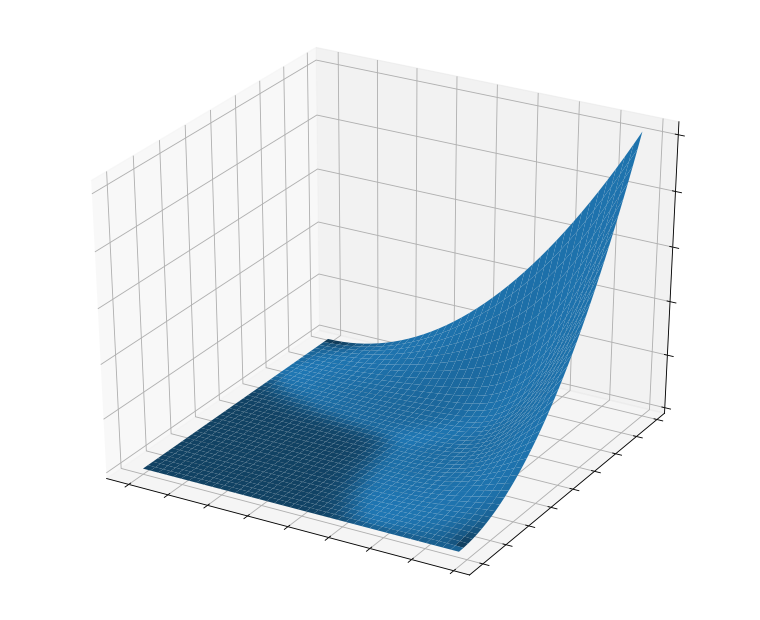

In [105]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(-1.0, 1.0, 2/a_4.shape[1])
X, Y = np.meshgrid(x, y)
Z = a_4
ax.plot_surface(X, Y, Z)

ax.tick_params(
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False, # labels along the bottom edge are off
    labelleft=False)

plt.show()

In [5]:
x1 = 0
x2 = 1

In [55]:
def gauss_siedel(dx, x, y, x_last,x_next,y_last,y_next):
    return (x_last+x_next+y_last+y_next)/4 - (x*x+y*y)


def main_2(dx=0.25):
    err = 1e-9
    
    n = int((x2-x1)/dx)
    
    w = 1.3
    
    xy = np.zeros((n+1,n+1,2))    
    u_xy_prev = np.zeros((n+1,n+1))
    u_xy_recent = np.zeros((n+1,n+1))
    
    for i in range(n+1):
        for j in range(n+1):
            xy[i][j][0] = x1+i*dx
            xy[i][j][1] = x1+j*dx
    
    flag=10
    count = 0
    while(flag!=0):
        count = count+1
        for i in range(n-1):
            for j in range(n-1):
                u_xy_recent[i+1][j+1] = gauss_siedel(dx,xy[i+1][j+1][0], xy[i+1][j+1][1], 
                                         u_xy_prev[i+2][j+1],
                                         u_xy_recent[i][j+1],
                                         u_xy_prev[i+1][j+2], 
                                         u_xy_recent[i+1][j])
                u_xy_recent[i+1][j+1] = w * u_xy_recent[i+1][j+1] + (1-w)*u_xy_prev[i+1][j+1]
        
        if np.max(np.absolute(u_xy_prev-u_xy_recent))<err and count > n+2:
            flag = 0
        u_xy_prev = u_xy_recent
        #flag = flag-1
        
    return [u_xy_recent, xy, count]

In [56]:
a_1, x_1, c1 = main_2(0.25)
a_2, x_2, c2 = main_2(0.1)
a_3, x_3, c3 = main_2(0.05)
a_4, x_4, c4 = main_2(0.025)

In [57]:
print(c1,c2,c3,c4)

7 13 23 43


In [58]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print(a_2)

[[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 -0.48 -0.99 -1.58 -2.24 -2.95 -3.62 -4.08 -4.03 -2.99 0.00]
 [0.00 -0.99 -1.99 -3.05 -4.20 -5.38 -6.42 -7.04 -6.72 -4.73 0.00]
 [0.00 -1.58 -3.05 -4.52 -6.03 -7.52 -8.77 -9.37 -8.73 -5.97 0.00]
 [0.00 -2.24 -4.20 -6.03 -7.83 -9.51 -10.84 -11.36 -10.37 -6.96 0.00]
 [0.00 -2.95 -5.38 -7.52 -9.51 -11.29 -12.63 -13.02 -11.74 -7.80 0.00]
 [0.00 -3.62 -6.42 -8.77 -10.84 -12.63 -13.90 -14.18 -12.69 -8.40 0.00]
 [0.00 -4.08 -7.04 -9.37 -11.36 -13.02 -14.18 -14.37 -12.85 -8.56 0.00]
 [0.00 -4.03 -6.72 -8.73 -10.37 -11.74 -12.69 -12.85 -11.59 -7.86 0.00]
 [0.00 -2.99 -4.73 -5.97 -6.96 -7.80 -8.40 -8.56 -7.86 -5.55 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]


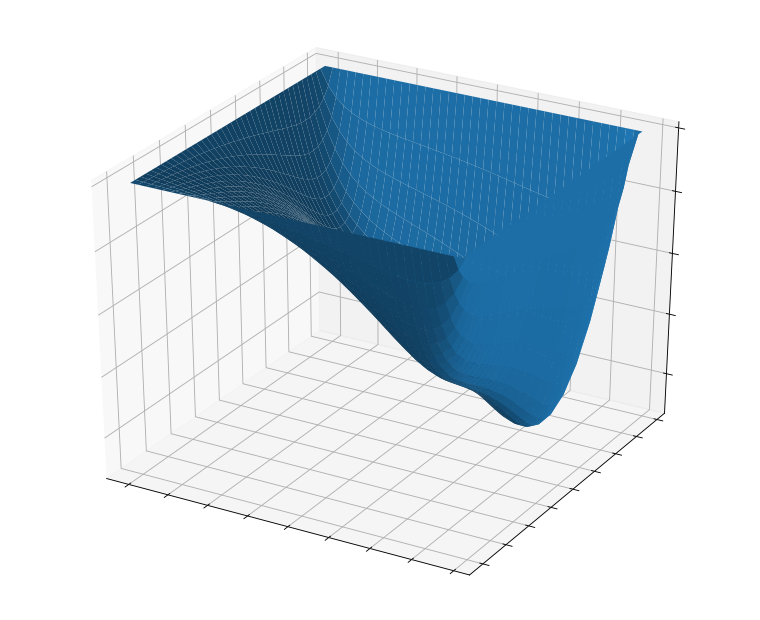

In [59]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(-1.0, 1.0, 2/a_4.shape[1])
X, Y = np.meshgrid(x, y)
Z = a_4
ax.plot_surface(X, Y, Z)

ax.tick_params(
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False, # labels along the bottom edge are off
    labelleft=False)

plt.show()

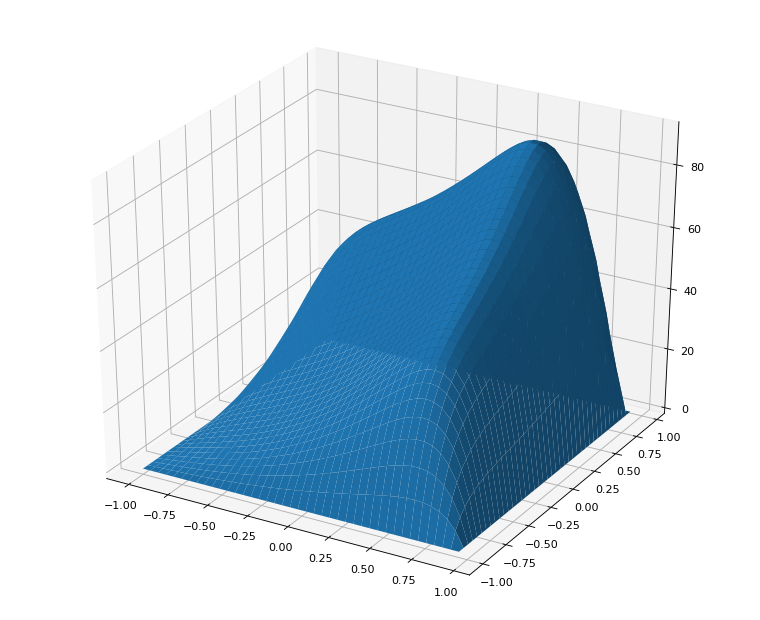

In [60]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(-1.0, 1.0, 2/a_4.shape[1])
X, Y = np.meshgrid(x, y)
Z = a_4
ax.plot_surface(X, Y, np.absolute(Z))

# ax.tick_params(
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False, # labels along the bottom edge are off
#     labelleft=False)

plt.show()